In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from src import utils, plots
from src.inputs import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load observation data
prect_sources = ["GPCC", "CRUT", "APHR"]
sst_sources = ["ERSST", "HADISST", "COBESST"]

obs_msea_prect_anomalies = {source: utils.get_obs_msea_prect_anomaly_timeseries_mam(
    source) for source in prect_sources}
obs_nino34_sst_anomalies = {source: utils.get_obs_nino34_sst_anomaly_timeseries_djf(
    source) for source in sst_sources}

obs_msea_prect_anomalies_list = [
    obs_msea_prect_anomalies["GPCC"],
    obs_msea_prect_anomalies["CRUT"],
    obs_msea_prect_anomalies["APHR"],
]

obs_nino34_sst_anomalies_list = [
    obs_nino34_sst_anomalies["ERSST"],
    obs_nino34_sst_anomalies["HADISST"],
    obs_nino34_sst_anomalies["COBESST"],
]

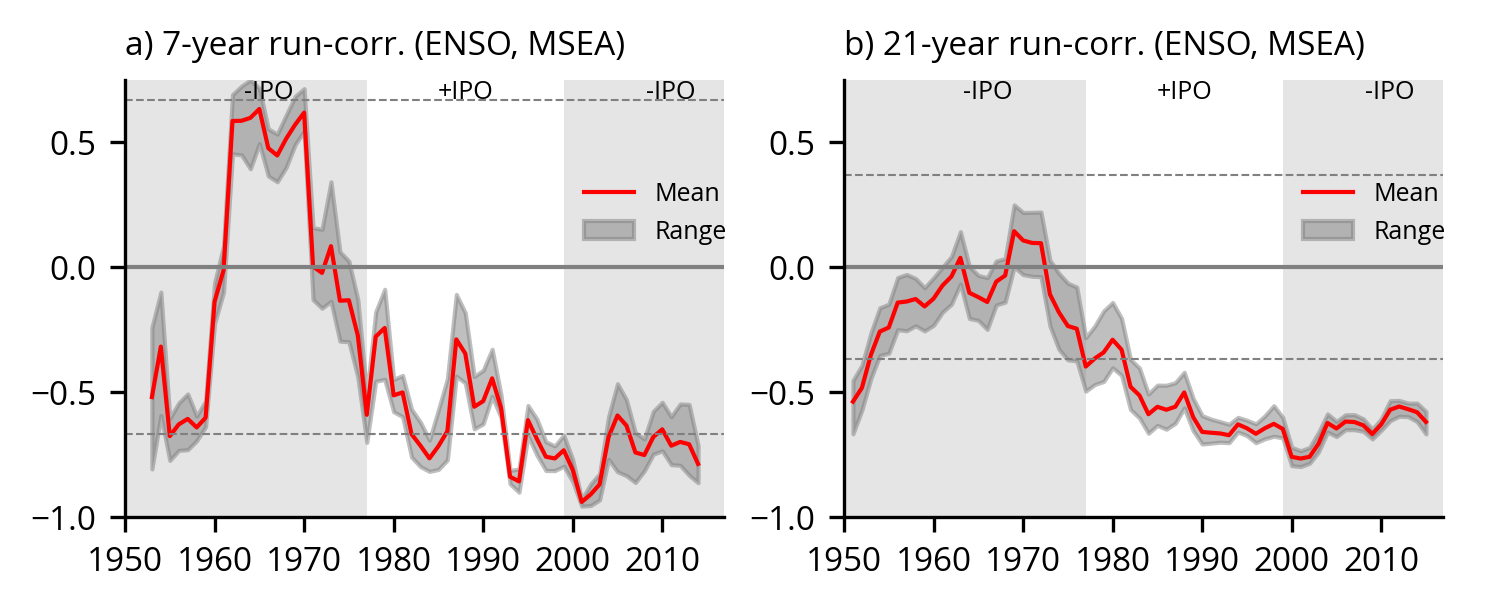

In [15]:
utils.set_matplotlib_font("Open Sans")

color = 'black'

mpl.rcParams.update({
    'axes.edgecolor': color,      # Color of the axes spines
    'xtick.color': color,         # Color of the x-axis ticks
    'ytick.color': color,         # Color of the y-axis ticks
    'xtick.labelcolor': color,    # Color of the x-axis tick labels
    'ytick.labelcolor': color,    # Color of the y-axis tick labels
    'grid.color': color,          # Color of the grid lines
    'axes.labelcolor': color,     # Color of the axis labels
    'axes.titlecolor': color,     # Color of the plot titles
})

mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth

mpl.rcParams.update({
    'font.size': 8, 
    'axes.titlesize': 8, 
    'axes.labelsize': 8,
    'xtick.labelsize': 8, 
    'ytick.labelsize': 8, 
    'legend.fontsize': 8,
    'figure.titlesize': 8
})

fig_width_cm = 12 
fig_height_cm = 5
fig_width_in = fig_width_cm / 2.54
fig_height_in = fig_height_cm / 2.54

fig = plt.figure(figsize=(fig_width_in, fig_height_in), dpi=300)

gs1 = GridSpec(1, 2, top=0.89, bottom=0.15, left=0.06, right=0.99, wspace=0.2, width_ratios=[0.5, 0.5])
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

############## Figure S1a ##############
plots.plot_runcorr_statistics_timeseries(obs_nino34_sst_anomalies_list,
                                   obs_msea_prect_anomalies_list, ax1,
                                   window=7)

############## Figure S1b ##############
plots.plot_runcorr_statistics_timeseries(obs_nino34_sst_anomalies_list,
                                   obs_msea_prect_anomalies_list, ax2,
                                   window=21)

# Set subplot labels
titles = ["a) 7-year run-corr. (ENSO, MSEA)", "b) 21-year run-corr. (ENSO, MSEA)"]
for i, (ax, title) in enumerate(zip([ax1, ax2], titles)):
    ax.set_title(title, loc="left", fontsize=8)


plt.savefig("FigS1.png")
plt.savefig("FigS1.pdf")
